# Assignment 1: Reinforcement learning 

# Code: VP5014RP

In [1]:
import matplotlib.pyplot as plt
import numpy as np

1)Implement the simple bandit algorithm on this problem. Randomly choose
an action at each time.

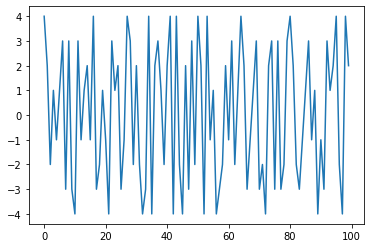

In [52]:
k=[1,2,3,4]# k est le nombre d'action
j=[]
Q=[0 for i in range(len(k))]
N=[0 for i in range(len(k))]
for l in range(100):
    A=np.random.choice(k) # l'aleatoire de l'action choisie en fonction du temps
    N[A-1]=N[A-1]+1
    r=(-1)**(N[A-1]+1)*A
    j.append(r)
    Q[A-1]=Q[A-1]+1/N[A-1]*(r-Q[A-1])
plt.plot(j)

2)Implement the simple bandit algorithm on this problem. Choose the
greedy action each time.

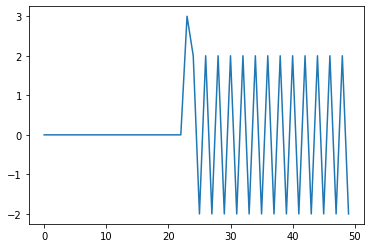

In [100]:
import numpy as np
k=[1,2,3,4] #k est le nombre d'action
t=[]
epsilon=0.01 
for l in range(100):
    Q=[0 for i in range(len(k))]
    N=[0 for i in range(len(k))]
for i in range(50):
    if np.random.rand()<epsilon: # cette commande est 
                                #pour generer la probabilite en fonction de espilon
        A=k.index(np.random.choice(k))# A reccupère tous les index des actions 
    else:   
        A=np.argmax(Q) #le greedy action
    N[A-1]=N[A-1]+1
    r=(-1)**(N[A-1]+1)*A
    Q[A-1]=Q[A-1]+1/N[A-1]*(r-Q[A-1])
    t.append(r)
plt.plot(t)        

3)Show the evolution of the reward R on a graphic

a)Do the same using the reward probabilities change over time.

In [82]:
Action=[1,2,3,4] 
K=[]
N=[0 for i in range(4)]
Q=[0 for i in range(4)]
alpha=0.5
for j in range(50):
    A=np.random.choice(Action)
    N[A-1]=N[A-1]+1
    R=(-1)**(N[A-1]+1)*A
    K.append(R)
    Q[A-1]=Q[A-1]+alpha*(R-Q[A-1])
   

b)Do the same using the preference.

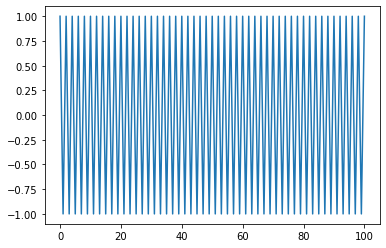

In [99]:
alpha=0.01
Action=[1,2,3,4]
N=[0 for i in range(4)]
Q=[0 for i in range(4)]
H=[4,3,2,1]
denomiateur=sum(np.exp(H))
P=[0 for i in range(len(H))]
for a in range(len(Action)):
    P[a]=np.exp(H[a])/denominateur
K=[]
A=np.argmax(P)
N[A]=N[A]+1
R=(-1)**(N[A]+1) *(A+1)
prob=[]
prob.append(P)
Q[A]=Q[A]+(R-Q[A])/N[A]
K.append(R)
n=100
for j in range(n):
    for s in range(len(Action)):
        if s==A:
            H[s]=H[s]+alpha*(R-np.mean(K))*(1-P[A])
        else:
            H[s]=H[s]+alpha*(R-np.mean(K))*(P[A])
    deno=sum(np.exp(H))
    for k in range(len(Action)):
        P[k]=np.exp(H[k])/denominateur
    A=np.argmax(P)
    prob.append(P)
    N[A]=N[A]+1
    R=(-1)**(N[A]+1) *(A+1)
    K.append(R)
    Q[A]=Q[A]+(R-Q[A])/N[A]
plt.plot(K)      

c)Randomly initialize the preferences.

In [9]:
alpha=0.1
Action=[1,2,3,4]
N=[0 for i in range(4)]
Q=[0 for i in range(4)]
H=[1,4,2,3]
K=[]
A=H.index(np.random.choice(H))
N[A]=N[A]+1
R=(-1)**(i+1)*(A+1)
Q[A]=Q[A]+(R-Q[A])/N[A]
K.append(Q[A])
for j in range(100):
    for i in range(j+1):
        for s in range(len(Action)):
            if s==A:
                H[s]=H[s]+alpha*(R-Q[A])*(1-P[A])
            else:
                H[s]=H[s]+alpha*(R-Q[A])*(P[A])
        A=H.index(np.random.choice(H))
        N[A]=N[A]+1
        R=(-1)**(i+1)*(A+1)
        Q[A]=Q[A]+(R-Q[A])/N[A]
    K.append(Q[A])

d)Test many values of alpha

In [10]:
alpha=[0.01,0.08,0.30]
for g in range(len(alpha)):
    Action=[1,2,3,4]
    N=[0 for i in range(4)]
    Q=[0 for i in range(4)]
    H=[1,4,2,3]
    K=[]
    A=H.index(np.random.choice(H))
    N[A]=N[A]+1
    R=(-1)**(i+1)*(A+1)
    Q[A]=Q[A]+(R-Q[A])/N[A]
    K.append(Q[A])
    for j in range(50):
        for i in range(j+1):
            for s in range(len(Action)):
                if s==A:
                    H[s]=H[s]+alpha[g]*(R-Q[A])*(1-P[A])
                else:
                    H[s]=H[s]+alpha[g]*(R-Q[A])*(P[A])
            A=H.index(np.random.choice(H))
            N[A]=N[A]+1
            R=(-1)**(i+1)*(A+1)
            Q[A]=Q[A]+(R-Q[A])/N[A]
        K.append(Q[A])        